# Time Series Forecasting

In [132]:
# ! pip install openpyxl

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import os
df = pd.read_excel('Book4.xlsx')
df.dtypes

Date    datetime64[ns]
X1               int64
X2               int64
X3               int64
X4               int64
X5               int64
X6               int64
X7               int64
X8               int64
X9               int64
X10              int64
X11              int64
X12              int64
X13              int64
X14              int64
X15              int64
X16              int64
X17              int64
X18              int64
X19              int64
dtype: object

In [250]:
# df = df.drop('X18',axis = 1)
df.head()

,Date,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,2022-01-01,167,15658,653,1,1594,222,4867,12698,256000,102,368,10533,1621,1683,75,47,66,0,163
1,2022-02-01,445,12549,1846,0,1165,164,2794,9864,307741,177,316,6710,934,643,57,58,6,0,80
2,2022-03-01,311,12097,3211,0,2601,296,3316,15726,301920,119,436,12727,2388,1954,36,28,152,0,209
3,2022-04-01,102,18383,2600,0,300,242,3126,17492,241202,88,372,13564,2124,2045,42,42,76,0,126
4,2022-05-01,388,11704,4545,0,587,733,5752,19215,262481,99,327,14728,2112,1964,39,50,18,0,159


In [251]:
df.index = df.Date
df.drop(['Date'],axis=1,inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,167,15658,653,1,1594,222,4867,12698,256000,102,368,10533,1621,1683,75,47,66,0,163
2022-02-01,445,12549,1846,0,1165,164,2794,9864,307741,177,316,6710,934,643,57,58,6,0,80
2022-03-01,311,12097,3211,0,2601,296,3316,15726,301920,119,436,12727,2388,1954,36,28,152,0,209
2022-04-01,102,18383,2600,0,300,242,3126,17492,241202,88,372,13564,2124,2045,42,42,76,0,126
2022-05-01,388,11704,4545,0,587,733,5752,19215,262481,99,327,14728,2112,1964,39,50,18,0,159


<Axes: xlabel='Date'>

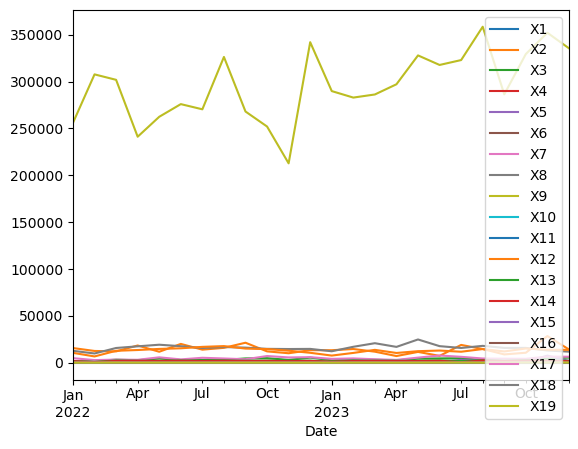

In [252]:
df.plot()

# Handling Missing values

Since, Missing values are tagged with -200 value. We will have to impute the missing value with a better number. Consider if the present dew point value is missing, we can safely assume that it will be close to the value of the previous hour.  I will impute -200 with the previous value.

In [253]:
cols = df.columns
# df = df.fillna(0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,167,15658,653,1,1594,222,4867,12698,256000,102,368,10533,1621,1683,75,47,66,0,163
2022-02-01,445,12549,1846,0,1165,164,2794,9864,307741,177,316,6710,934,643,57,58,6,0,80
2022-03-01,311,12097,3211,0,2601,296,3316,15726,301920,119,436,12727,2388,1954,36,28,152,0,209
2022-04-01,102,18383,2600,0,300,242,3126,17492,241202,88,372,13564,2124,2045,42,42,76,0,126
2022-05-01,388,11704,4545,0,587,733,5752,19215,262481,99,327,14728,2112,1964,39,50,18,0,159


# Checking Stationarity

In [255]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

def check_stationarity(series, name):
    # Skip the test if the series is constant
    if np.std(series) == 0:
        print(f"{name} is constant. Skipping ADF test.")
        return
    
    print(f"Results of Dickey-Fuller Test for {name}:")
    dftest = adfuller(series.dropna(), autolag='AIC')  # Ensure to drop NaN values
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput, "\n")

# Assuming 'df' is your DataFrame
for col in df.columns:
    check_stationarity(df[col], col)


Results of Dickey-Fuller Test for X1:
Test Statistic                -7.486429e+00
p-value                        4.626027e-11
#Lags Used                     2.000000e+00
Number of Observations Used    2.000000e+01
Critical Value (1%)           -3.809209e+00
Critical Value (5%)           -3.021645e+00
Critical Value (10%)          -2.650713e+00
dtype: float64 

Results of Dickey-Fuller Test for X2:
Test Statistic                 -3.367662
p-value                         0.012112
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64 

Results of Dickey-Fuller Test for X3:
Test Statistic                 -4.018763
p-value                         0.001315
#Lags Used                      3.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Va

In [254]:
from statsmodels.tsa.stattools import adfuller

def adf_test_with_diff(series):
    """
    Performs ADF test on the series. If p-value > 0.05, it differentiates the series
    and tests again, until p-value <= 0.05 or the series becomes constant.
    """
    # Kiểm tra xem series có phải là constant không
    if series.nunique() == 1:  # Tất cả giá trị trong series giống nhau
        print("Series is constant. ADF test cannot be performed.")
        return None, None, series

    p_value = 1
    d = 0  # Differencing count
    while p_value > 0.05:
        result = adfuller(series.dropna(), autolag='AIC')
        p_value = result[1]
        if p_value > 0.05:
            series = series.diff().dropna()
            d += 1
            if series.dropna().nunique() <= 1:
                print("Series has become constant, stopping differentiation.")
                break
    print(f"Differencing level: {d}, p-value: {p_value}")
    return d, p_value, series

for col in df.columns:
    print(f"Processing column: {col}")
    d, p_value, diffed_series = adf_test_with_diff(df[col])
    df[col] = diffed_series


Processing column: X1
Differencing level: 1, p-value: 4.626026622681147e-11
Processing column: X2
Differencing level: 0, p-value: 0.01211190936220797
Processing column: X3
Differencing level: 0, p-value: 0.001315389182555255
Processing column: X4
Differencing level: 0, p-value: 0.03481126658554075
Processing column: X5
Differencing level: 5, p-value: 2.397637575591223e-06
Processing column: X6
Differencing level: 0, p-value: 1.8619005750948266e-06
Processing column: X7
Differencing level: 0, p-value: 0.014906659260758327
Processing column: X8
Differencing level: 0, p-value: 0.020218474505311185
Processing column: X9
Differencing level: 0, p-value: 0.0076177532600693425
Processing column: X10
Differencing level: 1, p-value: 1.8797435328413352e-05
Processing column: X11
Differencing level: 2, p-value: 1.4779504723490714e-05
Processing column: X12
Differencing level: 1, p-value: 8.371402863729916e-09
Processing column: X13
Differencing level: 0, p-value: 4.2904616175861055e-05
Processing 

In [256]:

for col in df.columns:
    # Tính giá trị trung bình của cột, bỏ qua giá trị NaN
    col_mean = df[col].mean(skipna=True)
    # Điền giá trị NaN trong cột bằng giá trị trung bình của cột
    df[col] = df[col].fillna(col_mean)


<Axes: xlabel='Date'>

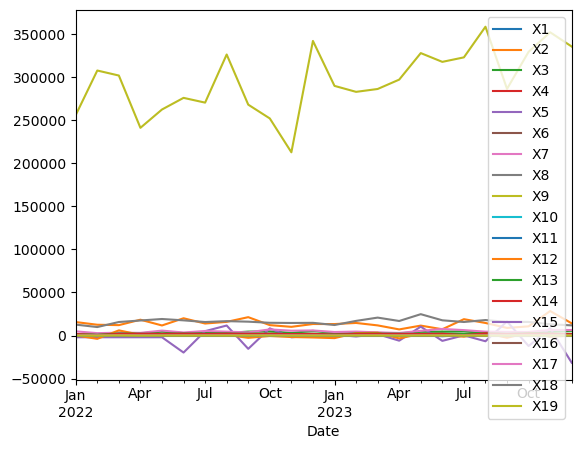

In [257]:
df.plot()

In [258]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,16.913043,15658,653,1,-1987.368421,222,4867,12698,256000,1.652174,7.227273,141.130435,1621,1683,0.590909,47,66,0,4.73913
2022-02-01,278.000000,12549,1846,0,-1987.368421,164,2794,9864,307741,75.000000,7.227273,-3823.000000,934,643,0.590909,58,6,0,-83.00000
2022-03-01,-134.000000,12097,3211,0,-1987.368421,296,3316,15726,301920,-58.000000,172.000000,6017.000000,2388,1954,-3.000000,28,152,0,129.00000
2022-04-01,-209.000000,18383,2600,0,-1987.368421,242,3126,17492,241202,-31.000000,-184.000000,837.000000,2124,2045,27.000000,42,76,0,-83.00000
2022-05-01,286.000000,11704,4545,0,-1987.368421,733,5752,19215,262481,11.000000,19.000000,1164.000000,2112,1964,-9.000000,50,18,0,33.00000
2022-06-01,-4.000000,20076,2879,2,-19741.000000,199,3540,17649,276000,-2.000000,151.000000,672.000000,2438,2140,6.000000,38,55,0,-30.00000
2022-07-01,-78.000000,13957,3002,0,5119.000000,247,5281,15706,270464,-21.000000,-81.000000,1519.000000,2113,1841,-4.000000,56,29,0,14.00000
2022-08-01,-40.000000,15881,2969,0,11640.000000,224,4521,16722,326338,20.000000,-90.000000,821.000000,2331,2118,8.000000,49,102,0,-54.00000
2022-09-01,109.000000,21345,4572,0,-15428.000000,368,3696,16109,268108,-22.000000,91.000000,-2648.000000,2100,1845,-6.000000,37,73,0,55.00000


# Building Model

In [259]:
from statsmodels.tsa.vector_ar.var_model import VAR
#creating the train and validation set
train = df[:int(0.8*(len(df)))]
valid= df[int(0.8*(len(df))):]
train.shape


(19, 19)

In [225]:
valid.shape

(5, 19)

In [260]:


model = VAR(endog=train)
model_fit = model.fit()
# Dự đoán
prediction = model_fit.forecast(model_fit.endog, steps=len(valid))
prediction


/Users/kate/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


array([[-4.86869525e+02,  6.53946050e+04,  2.36543898e+04,
        -2.59024910e+00, -6.55058328e+04,  1.70602462e+03,
         1.41785529e+04,  3.19308444e+04,  7.33550784e+05,
         3.14034400e+01, -9.77544406e+01,  1.71618864e+04,
         7.07265773e+03,  7.30010695e+03, -1.35028853e+02,
         6.07146252e+01,  2.44524920e+02,  0.00000000e+00,
         5.57033926e+02],
       [-2.22024156e+03,  6.39945998e+03, -1.70236492e+04,
         3.35044647e+00,  2.51216996e+04, -2.61219330e+02,
        -6.66044521e+03, -8.81100118e+03, -4.61729685e+04,
         1.26945450e+01, -3.18220901e+03, -2.57494040e+04,
        -4.61164519e+03, -4.16532218e+03,  3.11079112e+02,
         1.87699258e+02, -3.91046348e+02,  0.00000000e+00,
        -7.79253910e+02],
       [ 1.49464322e+03,  7.57108070e+04,  2.47453257e+04,
        -8.35364073e-01, -9.25434609e+04,  1.90001963e+03,
         5.85306237e+03,  8.47186712e+04,  9.54075728e+05,
         2.51018116e+02,  5.51245057e+03,  5.35172156e+04,
    

The predictions are in the form of an array, where each list represents the predictions of the row. We will transform this into a more presentable format.

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#converting predictions to dataframe

pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,19):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

# check acc
for i in cols:
    print(f'RMSE value for {i} is: ', sqrt(mean_squared_error(pred[i], valid[i])))
    print(f'MAE value for {i} is: ', mean_absolute_error(pred[i], valid[i]))
    print(f'MSE value for {i} is: ', mean_squared_error(pred[i], valid[i]))
    # Note: For r2_score, the correct order is actual values first, then predictions
    print(f'R2 score for {i} is: ', r2_score(valid[i], pred[i]))
    print('\n')



RMSE value for X1 is:  4548.292385713338
MAE value for X1 is:  2853.5214032601084
MSE value for X1 is:  20686963.62593793
R2 score for X1 is:  -265.2423104773802


RMSE value for X2 is:  85801.51048982881
MAE value for X2 is:  67128.17383016773
MSE value for X2 is:  7361899202.336205
R2 score for X2 is:  -153.55265792871197


RMSE value for X3 is:  37293.31271821663
MAE value for X3 is:  31620.778381259122
MSE value for X3 is:  1390791173.4986982
R2 score for X3 is:  -908.4242091324727


RMSE value for X4 is:  6.013375237901633
MAE value for X4 is:  5.176753928480346
MSE value for X4 is:  36.160681751808525
R2 score for X4 is:  -0.043899588678075085


RMSE value for X5 is:  104970.10627338341
MAE value for X5 is:  74147.10289865494
MSE value for X5 is:  11018723211.045408
R2 score for X5 is:  -38.408773919403025


RMSE value for X6 is:  2480.2031685642314
MAE value for X6 is:  1804.5900635267542
MSE value for X6 is:  6151407.757356053
R2 score for X6 is:  -1262.164243046189


RMSE valu

After the testing on validation set, lets fit the model on the complete dataset

# Final Predictions

In [262]:

model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.endog, steps=1)
print(yhat)

[[-7.17106062e+02  1.03408238e+04 -2.09690911e+03  2.36967958e+01
   3.16533137e+04  1.61893873e+02  3.50921431e+03  8.23434116e+03
   1.70495300e+05 -1.82095898e+01 -1.16698121e+03 -2.33428903e+03
   1.90794377e+03  1.50951594e+03 -7.26807779e+00  6.77912023e+01
  -1.34203718e+01  0.00000000e+00 -8.03258622e+01]]


/Users/kate/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [122]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming `df` is your DataFrame prepared for VAR modeling
model = VAR(endog=df)
model_fit = model.fit()

# Forecasting the next step
yhat = model_fit.forecast(model_fit.endog, steps=12)

# Convert the forecast array to a DataFrame and round to nearest integer
yhat_df = pd.DataFrame(yhat, columns=df.columns).round().astype(int)

print(yhat_df)


      X1     X2     X3   X4      X5   X6     X7     X8       X9   X10    X11  \
0   -717  10341  -2097   24   31653  162   3509   8234   170495   -18  -1167   
1    713   9102   2126   -2   -9368   95    618  22670   512086   126   2829   
2     91  27242   2017   27   11386  416   4520   1891   242134  -265  -4291   
3    575  23266   8108  -17  -38520  517   7383  18523   411085   260   4362   
4  -1409  18708  -3600   38   41029  185   6240  -2796     2875   -89  -4796   
5    359   9337   5873  -26  -48936   92  -2283  24058   614579   290   7055   
6     38  22595  -4616   56   62957  471   3671  -6033    -8036  -611  -9570   
7   1797  13407  12433  -48  -68705  332   4746  37644   667706   676  11166   
8  -1858  26601  -6918   71   66156  647  10326 -26083  -341330  -608 -13509   
9    618  23630  16467  -84 -107042 -150  -2171  50219  1037878   898  18154   
10 -1315   8638 -15951  122  136500  720   7620 -39632  -630924 -1305 -23897   
11  2939   4150  21767 -127 -146541 -160

/Users/kate/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Thanks. Hope you like this notebook.

Acknowledgement: Blog post on Multivariate analysis by Aishwarya Singh [blog](https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/)